# Compute metrics using HOI package

Import libraries

In [60]:
import numpy as np
import pandas as pd
from collections import defaultdict
import hoi
from hoi.plot import plot_landscape
from hoi.utils import get_nbest_mult
from numpy import random
import matplotlib.pyplot as plt
from hoi.metrics import InfoTopo, TC, DTC, Sinfo, Oinfo, RedundancyphiID, SynergyphiID

Define functions

In [81]:
# Function to compute a desired information metric
def compute_information_metric(metric, data):
    data_array=np.array(np.array(data)).astype(float)
    model = metric(data_array)
    metric_results = model.fit(minsize=2,maxsize=5)
    return metric_results, model

# Function to divide list into list per order
def divide_list_into_orders(hoi, model):
    minsize = None
    maxsize = None

    # get orders
    if model:
        orders = model.order

    # get computed orders
    if minsize is None:
        minsize = orders.min()
    if maxsize is None:
        maxsize = orders.max()   

    # order selection
    keep = np.logical_and(orders >= minsize, orders <= maxsize)
    hoi = hoi[keep]
    orders = orders[keep]

    # Group the values per order
    grouped = defaultdict(list)
    for o, h in zip(orders, hoi):
        grouped[o].append(h.item())  # Convert from NumPy array to float

    # Sort each list
    for key in grouped:
        grouped[key] = sorted(grouped[key])

    return grouped

# Function to plot row of histograms for all orders
def histogram_per_order(grouped, metric):
    # Sort grouped values
    for key in grouped:
        grouped[key] = sorted(grouped[key])

    # Prepare keys
    unique_orders = sorted(grouped.keys())
    all_values = sum(grouped.values(), [])  # Flatten all lists

    # Include "All Orders"
    plot_keys = ['All'] + unique_orders
    datasets = [all_values] + [grouped[k] for k in unique_orders]
    num_plots = len(datasets)

    # Create subplots
    fig, axes = plt.subplots(1, num_plots, figsize=(4 * num_plots, 4), sharey=True)

    if num_plots == 1:
        axes = [axes]

    # Plot each histogram normalized by its max count
    for ax, title, data in zip(axes, plot_keys, datasets):
        counts, bins = np.histogram(data, bins='auto')
        counts = counts / counts.max() if counts.max() != 0 else counts  # Normalize to max 1
        ax.bar(bins[:-1], counts, width=np.diff(bins), align='edge', color='skyblue', edgecolor='black')
        ax.set_title(f'{title if title != "All" else "All Orders"}')
        ax.set_xlabel('Metric value')
        ax.set_ylim(0, 1.05)  # Make space for label visibility

    # Optional: Label y-axis on the first plot
    axes[0].set_ylabel('Normalized Frequency (max = 1)')

    plt.suptitle(f'{metric.__name__} analysis')
    plt.tight_layout()
    plt.savefig(f'Results\\Random_timeseries\\{metric.__name__}_analysis.png', dpi=300)
    plt.close()

# Analyse the choosen metric with a row of histograms
def analyse_information_metric(metric, data):
    # Compute information metric
    metric_values, model = compute_information_metric(metric, data)
    
    # Divide list into lists per order
    divided_dict = divide_list_into_orders(metric_values, model)

    # Plot row of histograms per order
    histogram_per_order(divided_dict, metric)

Create random timeseries to test

In [82]:
n_timesteps = 100
n_variables = 20  

data = np.random.randn(n_timesteps, n_variables)
columns = [f'X{i+1}' for i in range(n_variables)]
df = pd.DataFrame(data, columns=columns)

Analyse metric values (choose from InfoTopo, TC, DTC, Sinfo, Oinfo, RedundancyphiID, SynergyphiID)

In [83]:
metrics = [InfoTopo, TC, DTC, Sinfo, Oinfo, RedundancyphiID, SynergyphiID]

for metric in metrics:
    analyse_information_metric(metric, df)

Compute entropy with gc
    Copnorm and demean the data
Get list of multiplets


  0%|          |  0/5 [00:00<?,       ?it/s]

Get list of multiplets


  0%|          | 0/21679 [00:00<?, ?it/s]

    Copnorm and demean the data
Get list of multiplets


  0%|          |  0/4 [00:00<?,       ?it/s]

    Copnorm and demean the data
Get list of multiplets


  0%|          |  0/4 [00:00<?,       ?it/s]

    Copnorm and demean the data
Get list of multiplets


  0%|          |  0/4 [00:00<?,       ?it/s]

    Copnorm and demean the data
Get list of multiplets


  0%|          |  0/4 [00:00<?,       ?it/s]

    Copnorm and demean the data
Get list of multiplets


  0%|          |  0/4 [00:00<?,       ?it/s]

    Copnorm and demean the data
Get list of multiplets


  0%|          |  0/4 [00:00<?,       ?it/s]

Plot metric landscape

<Axes: xlabel='Order', ylabel='Topological Information [Bits]'>

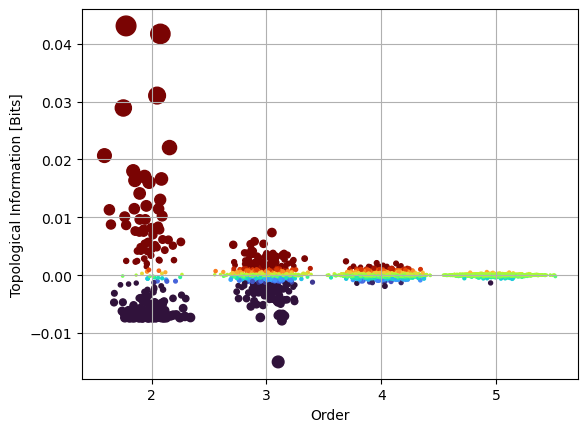

In [35]:
plot_landscape(
    metric_results,
    model,
    kind="scatter",
    undersampling=False,
    plt_kwargs=dict(cmap="turbo"),
)

# Attempt to unify analysis

In [36]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Define functions for visualisation
def average_metric_data(metric):
    all_keys = set()
    for sim in metric:
        for d in sim:
            all_keys.update(d.keys())
    sorted_keys = sorted(all_keys, key=lambda k: (len(k), k))

    data = []
    for t in range(len(metric[0])):  # number of timesteps
        averaged_dict = {}
        for k in sorted_keys:
            val = np.mean([sim[t].get(k, 0.0) for sim in metric])
            averaged_dict[k] = val
        sorted_values = [averaged_dict[k] for k in sorted_keys]
        data.append(sorted_values)

    return np.array(data), [str(k) for k in sorted_keys]

def compute_averages(metric):
    sim1, sim2 = metric
    avg_sim1 = [sum(d.values()) / len(d) for d in sim1]
    avg_sim2 = [sum(d.values()) / len(d) for d in sim2]
    avg_combined = [(a + b) / 2 for a, b in zip(avg_sim1, avg_sim2)]
    return avg_sim1, avg_sim2, avg_combined

In [38]:
# Example metrics list (add as many as you want)
metrics = [
    (
        [
            {(1,): 0.0, (2,): 0.0, (3,): 0.0, (1, 2): 0.199, (1, 3): 0.185, (2, 3): 0.192, (1, 2, 3): 2.027},
            {(1,): 0.123, (2,): 0.34, (3,): 0.721, (1, 2): 0.256, (1, 3): 0.467, (2, 3): 0.378, (1, 2, 3): 1.265}
        ],
        [
            {(1,): 0.853, (2,): 0.074, (3,): 0.279, (1, 2): 0.689, (1, 3): 0.983, (2, 3): 0.867, (1, 2, 3): 4.311},
            {(1,): 0.632, (2,): 0.002, (3,): 0.023, (1, 2): 0.327, (1, 3): 0.589, (2, 3): 0.256, (1, 2, 3): 1.542}
        ]
    ),
    (
        [
            {(1,): 0.15, (2,): 0.25, (3,): 0.35, (1, 2): 0.45, (1, 3): 0.55, (2, 3): 0.65, (1, 2, 3): 1.75},
            {(1,): 0.22, (2,): 0.31, (3,): 0.41, (1, 2): 0.52, (1, 3): 0.62, (2, 3): 0.72, (1, 2, 3): 1.89}
        ],
        [
            {(1,): 0.91, (2,): 0.11, (3,): 0.21, (1, 2): 0.61, (1, 3): 0.81, (2, 3): 0.71, (1, 2, 3): 3.55},
            {(1,): 0.44, (2,): 0.14, (3,): 0.24, (1, 2): 0.34, (1, 3): 0.54, (2, 3): 0.64, (1, 2, 3): 1.99}
        ]
    ),
    (
        [
            {(1,): 0.0, (2,): 0.0, (3,): 0.0, (1, 2): 0.199, (1, 3): 0.185, (2, 3): 0.192, (1, 2, 3): 2.027},
            {(1,): 0.123, (2,): 0.34, (3,): 0.721, (1, 2): 0.256, (1, 3): 0.467, (2, 3): 0.378, (1, 2, 3): 1.265}
        ],
        [
            {(1,): 0.853, (2,): 0.074, (3,): 0.279, (1, 2): 0.689, (1, 3): 0.983, (2, 3): 0.867, (1, 2, 3): 4.311},
            {(1,): 0.632, (2,): 0.002, (3,): 0.023, (1, 2): 0.327, (1, 3): 0.589, (2, 3): 0.256, (1, 2, 3): 1.542}
        ]
    ),
    (
        [
            {(1,): 0.15, (2,): 0.25, (3,): 0.35, (1, 2): 0.45, (1, 3): 0.55, (2, 3): 0.65, (1, 2, 3): 1.75},
            {(1,): 0.22, (2,): 0.31, (3,): 0.41, (1, 2): 0.52, (1, 3): 0.62, (2, 3): 0.72, (1, 2, 3): 1.89}
        ],
        [
            {(1,): 0.91, (2,): 0.11, (3,): 0.21, (1, 2): 0.61, (1, 3): 0.81, (2, 3): 0.71, (1, 2, 3): 3.55},
            {(1,): 0.44, (2,): 0.14, (3,): 0.24, (1, 2): 0.34, (1, 3): 0.54, (2, 3): 0.64, (1, 2, 3): 1.99}
        ]
    )
]

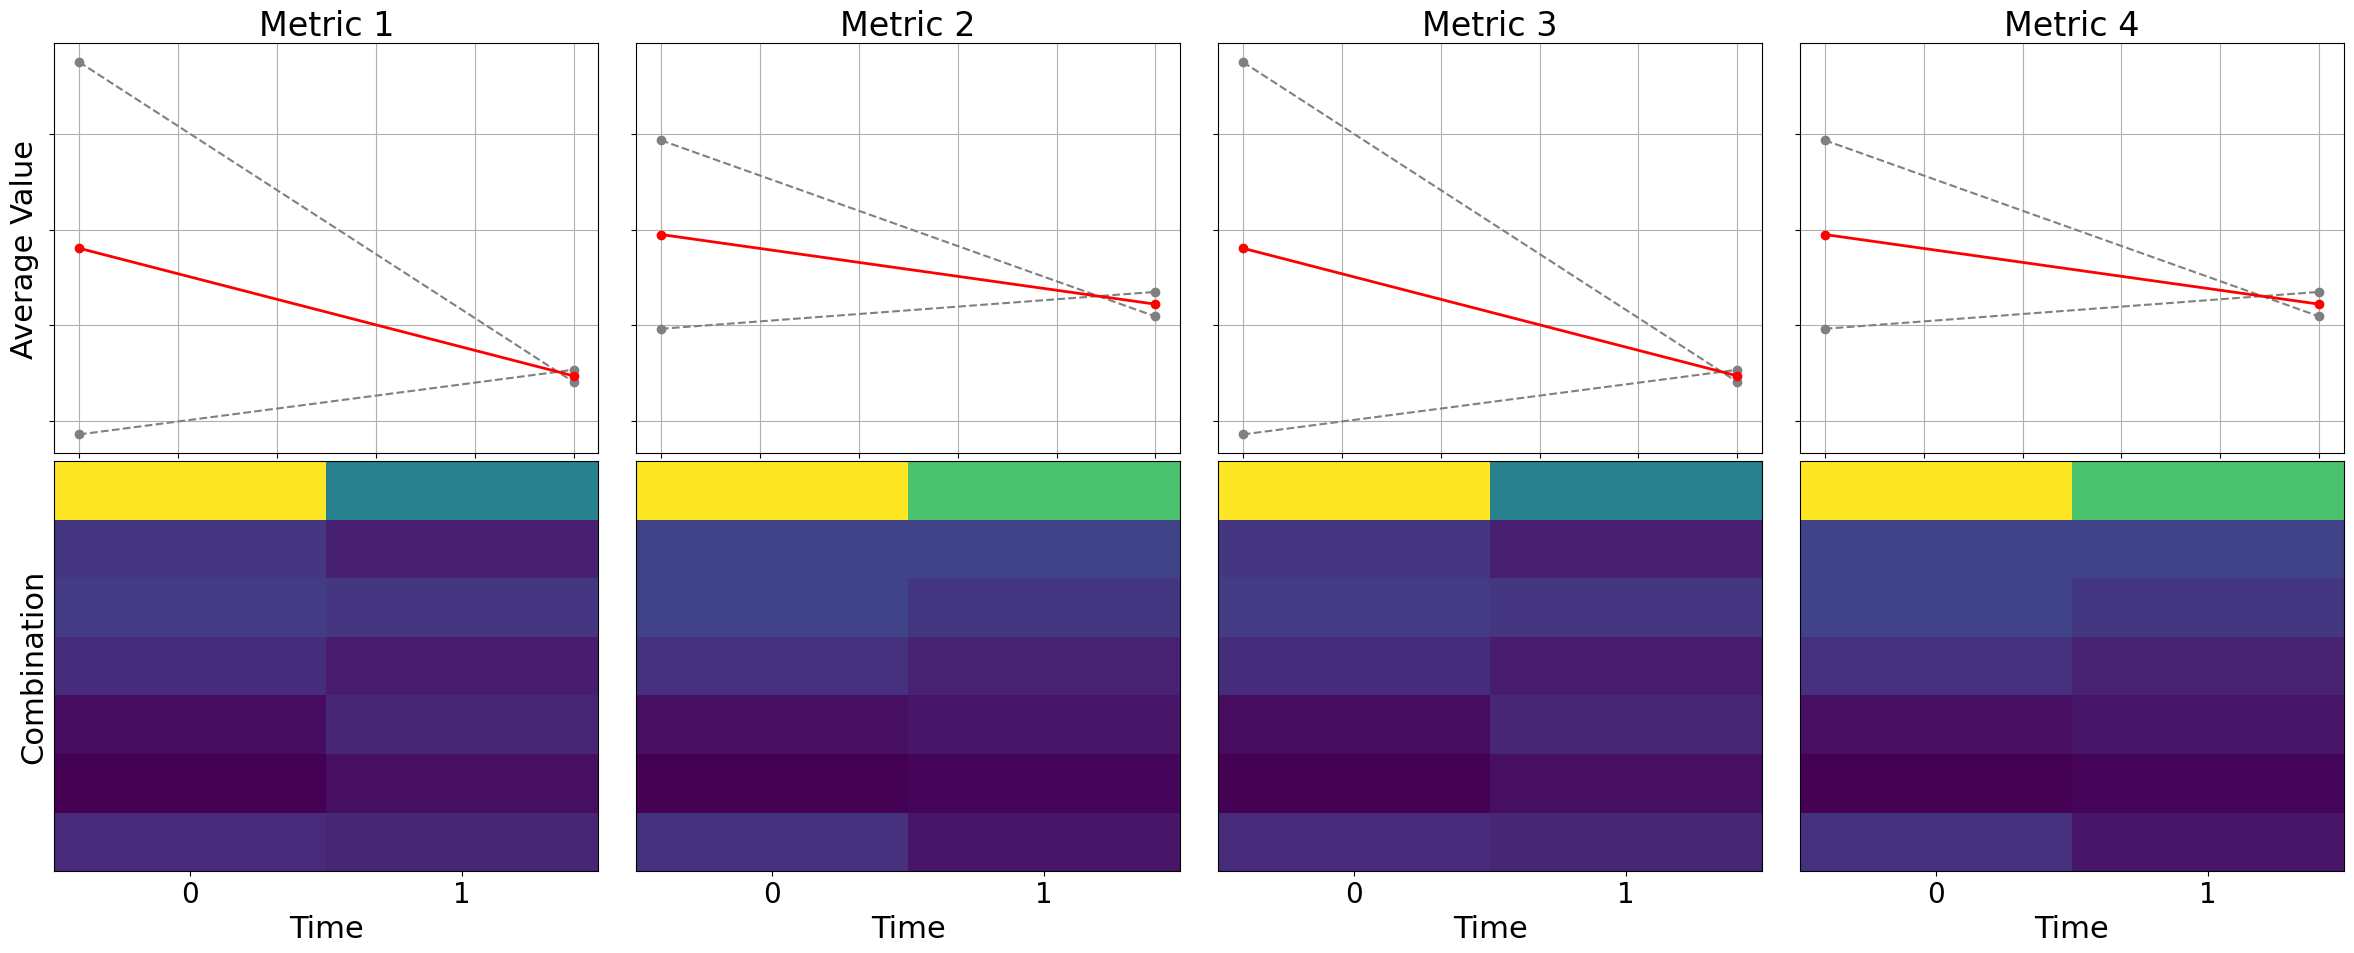

In [51]:
# Prepare data for all metrics
prepared_data = [average_metric_data(m) for m in metrics]
averages = [compute_averages(m) for m in metrics]

timesteps = list(range(1, len(metrics[0][0]) + 1))  # assumes same length for all metrics

# Adjust all font sizes globally
fontsize_standard = 20
plt.rcParams.update({
    'font.size': fontsize_standard+2,           # general font size
    'axes.titlesize': fontsize_standard+4,      # axes title font size
    'axes.labelsize': fontsize_standard+2,      # axes labels font size
    'xtick.labelsize': fontsize_standard,     # x tick labels font size
    'ytick.labelsize': fontsize_standard,     # y tick labels font size
    'legend.fontsize': fontsize_standard      # legend font size
})

# Setup figure with 2 rows and len(metrics) columns
fig, axs = plt.subplots(2, len(metrics), figsize=(6 * len(metrics), 10), sharey='row')

# If only one metric, axs will be 1D, fix to 2D for consistent indexing
if len(metrics) == 1:
    axs = np.array(axs).reshape(2,1)

# Top row: line plots
for i, (ax, (avg_sim1, avg_sim2, avg_combined), title) in enumerate(zip(
    axs[0],
    averages,
    [f"Metric {i+1}" for i in range(len(metrics))]
)):
    ax.plot(timesteps, avg_sim1, color='grey', linestyle='--', marker='o', label='Simulation 1')
    ax.plot(timesteps, avg_sim2, color='grey', linestyle='--', marker='o', label='Simulation 2')
    ax.plot(timesteps, avg_combined, color='red', marker='o', linewidth=2, label='Average')
    ax.set_title(title)
    ax.set_xticklabels([])  # hide x-ticks on top row
    
    # Show y-axis label only for first subplot in this row
    if i == 0:
        ax.set_ylabel("Average Value")
    else:
        ax.set_yticklabels([])  # hide y-axis labels for others
    
    # ax.legend()
    ax.grid(True)

# Bottom row: heatmaps
for i, (ax, (data, labels), title) in enumerate(zip(
    axs[1],
    prepared_data,
    [f"Heatmap: Metric {i+1}" for i in range(len(metrics))]
)):
    cax = ax.imshow(data.T, aspect='auto', cmap='viridis', origin='lower')
    ax.set_xlabel("Time")
    ax.set_xticks(np.arange(data.shape[0]))
    ax.set_xticklabels(np.arange(data.shape[0]))
    
    # Show y-axis labels only for first subplot in this row
    if i == 0:
        ax.set_ylabel("Combination")
        ax.set_yticks(np.arange(len(labels)))
        ax.set_yticklabels(labels)
    else:
        ax.set_yticklabels([])
        ax.set_yticks([])
    
    # ax.set_title(title)  # optionally add titles for heatmaps

plt.tight_layout(h_pad=0.1)
plt.show()